# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-1.31228576, -0.14469265],
        [-0.48350826,  0.22718505],
        [-0.05300711,  0.07764248],
        [-1.7163762 ,  0.7470816 ],
        [ 0.20325032, -0.57572514]]),
 array([1, 1, 0, 1, 0]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
Y_generative = np.concatenate((np.ones(500), -np.ones(500)))
X_generative = np.concatenate((np.random.multivariate_normal(m1,sigma,500), np.random.multivariate_normal(m2,sigma,500)))

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [5]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-1.8768666]), array([[1.84410286, 1.87931541]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [6]:
# sampling
pom = np.random.binomial(1, 0.5, 1000)

X_disciminative =  np.concatenate((np.random.multivariate_normal(m1,sigma,len(pom[pom==0])), np.random.multivariate_normal(m2,sigma,len(pom[pom==1]))))
Y_discriminative = np.random.binomial(1, 1/(1 + np.exp(2 - np.dot(np.array([2,2]),X_disciminative.T))), 1000)

In [7]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.99650092]), array([[2.14707153, 2.10900772]]))

#### Second bullet point

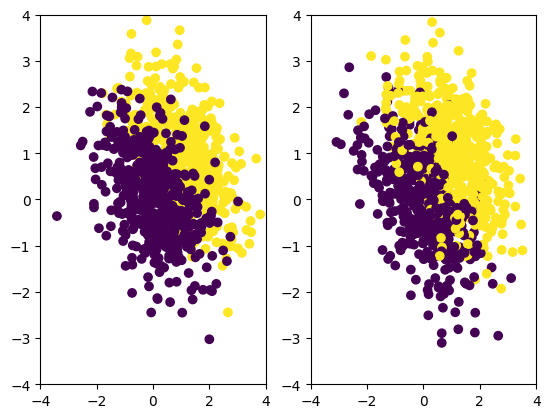

In [8]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_disciminative[:,0], X_disciminative[:,1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

...

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

# HOMEWORK

First we want to calculate ${C_{\beta_0,\pi}}$ (norming constrant). By applying the hints from the notebook with solutions:

$$ p(x|y=-1) = \frac{\pi p(x|y=1)(1-p(y=1|x))}{p(y=1|x)(1-\pi)} = \frac{\pi exp(-x)(1-\frac{1}{(1+exp(-\beta_0-\beta_1 x))})}{\frac{1}{(1+exp(-\beta_0-\beta_1 x))}(1-\pi)} = $$

$$ \frac{\pi exp(-x)(exp(-\beta_0-\beta_1 x))}{(1-\pi)} = \frac{\pi}{1-\pi}exp(-\beta_0)exp(-(1+\beta_1)x) $$

For probability distribution function the integral over domain equals 1:

$$ 1 = \int_{0}^{\infty} p(x|y=-1) = \int_{0}^{\infty} \exp(-\beta_0)\frac{\pi}{1 - \pi}\cdot\exp(- (1 + \beta_1)x \,dx = $$

$$\exp(-\beta_0)\frac{\pi}{1 - \pi}\cdot\int_{0}^{\infty} \exp(- (1 + \beta_1)x \,dx = $$

$${C_{\beta_0,\pi}}\cdot\int_{0}^{\infty} \exp(- (1 + \beta_1)x \,dx = $$


$${C_{\beta_0,\pi}} \cdot \frac{1}{\beta_1 + 1} $$

Thus

$${C_{\beta_0,\pi}}= \beta_1 + 1$$

Next we want to calculate $\beta_0$:

$$ \exp(-\beta_0)\frac{\pi}{1 - \pi} = (\beta_1+1) $$

$$ exp(\beta_0) = \frac{\pi}{(1-\pi)(\beta_1+1)} $$

$$ \beta_0 = log( \frac{\pi}{(1-\pi)(\beta_1+1)} ) $$

Q2: When we fix $\pi$ then $\beta_0$ is constrained by the norming constrant ${C_{\beta_0,\pi}}= \beta_1 + 1$ so if we choose $\beta_0$ freely we need to have specific $\beta_1$.

Q3: The intercept depends on $\pi$ so in case $\pi$ is not fixed, the intercept is not uniquely determined.

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)